<a href="https://colab.research.google.com/github/dined-io/dyned/blob/main/notebooks/DoorDesign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Designing a Door
In this notebook we will do a simple anthropometric analysis in support of defining basic dimensions of a door, namely the height of the door and the hight of the door knob. The dimensions are derived from a dataset of human body measurements by looking at averages and extremes of these dimensions. In this, we will focus on the Dutch population.

![](https://dined.nl/modules/resources/images/content/1d-door-example.jpg)

## Dataset

In [1]:
# ignore issue with certificate at dined-d site
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import pandas as pd

df = pd.read_excel("https://dined-d.io.tudelft.nl/ceasear/Measurements/Dutch_Measurements_Direct%20Measurements.xlsx")
df_3d = pd.read_excel("https://dined-d.io.tudelft.nl/ceasear/Measurements/Dutch_Measurements_3D%20Measurements.xlsx")

We have manual measurements:

In [2]:
df

,Subject Number,NL Subject Number,Gender,Age (Years),"Acromial Height, Sitting (mm)",Ankle Circumference (mm),Spine-to-Shoulder (mm),Spine-to-Elbow (mm),Arm Length (Spine to Wrist) (mm),Arm Length (Shoulder to Wrist) (mm),...,TTR 1 (mm),TTR 2 (mm),TTR 3 (mm),Triceps Skinfold (mm),Total Crotch Length (Crotch Length) (mm),Vertical Trunk Circumference (mm),"Waist Circumference, Pref (mm)",Waist Front Length (mm),"Waist Height, Preferred (mm)",Weight (kg)
0,11001,1001,Female,38.5,640.0,227.0,187,545.0,790.0,603.0,...,768,764,765.0,14.2,643.0,1571.0,724.0,362.0,1053.0,60.9
1,11002,1002,Female,30.8,623.0,248.0,204,530.0,770.0,566.0,...,767,754,756.0,17.6,694.0,1591.0,690.0,380.0,1004.0,63.2
2,11009,1009,Female,43.9,564.0,246.0,210,525.0,783.0,573.0,...,757,737,733.0,17.8,816.0,1726.0,1014.0,372.0,1014.0,85.0
3,11012,1012,Male,23.7,699.0,290.0,238,640.0,950.0,712.0,...,901,901,900.0,11.4,695.0,1870.0,916.0,502.0,1224.0,107.6
4,11017,1017,Female,33.3,556.0,240.0,194,510.0,762.0,568.0,...,757,756,749.0,14.2,599.0,1451.0,755.0,325.0,1014.0,61.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,17074,7074,Male,27.6,661.0,243.0,199,542.0,813.0,614.0,...,826,825,817.0,5.4,582.0,1669.0,888.0,463.0,1006.0,66.3
1263,17076,7076,Female,32.1,575.0,262.0,181,505.0,788.0,607.0,...,740,735,743.0,21.8,874.0,1745.0,871.0,347.0,1075.0,81.0
1264,17077,7077,Male,20.1,635.0,277.0,230,605.0,900.0,670.0,...,847,848,871.0,5.0,627.0,1732.0,858.0,465.0,1141.0,81.5
1265,17078,7078,Female,32.5,568.0,226.0,185,520.0,769.0,584.0,...,699,698,697.0,17.8,711.0,1568.0,820.0,346.0,1022.0,76.4


And we have measurements that were derived from 3D scan landmarks:

In [3]:
df_3d

,Subject Number,NL Subject,Gender,Age (Years),Acromial Ht Stand Lt (mm),Acromial Ht Stand Rt (mm),Acromion-Radiale Len Lt (mm),Acromion-Radiale Len Rt (mm),"Ankle Ht Lt (Malleolus, Lateral) (mm)","Ankle Ht Rt (Malleolus, Lateral) (mm)",...,Radiale-Stylion Len Rt (mm),Sellion Supramenton (mm),Sleeve Outseam Len Lt (mm),Sleeve Outseam Len Rt (mm),Sphyrion Ht Lt (mm),Sphyrion Ht Rt (mm),Suprasternale Ht (mm),Trochanterion Ht Lt (mm),Trochanterion Ht Rt (mm),Waist Back (mm)
0,11001,1001,Female,38.5,1429.49,1418.54,330.610,338.181,67.57,69.63,...,240.222,81.9387,549.200,580.235,67.21,71.64,1378.98,902.71,887.85,443.534
1,11009,1009,Female,43.9,1340.13,1339.80,279.639,292.023,64.42,66.33,...,230.662,100.8310,503.090,513.926,39.98,53.79,1324.25,848.78,849.73,371.282
2,11017,1017,Female,33.3,1334.32,1323.69,291.566,300.708,74.01,69.68,...,246.963,87.4224,525.895,536.522,50.39,60.17,1306.27,863.18,880.49,371.616
3,11021,1021,Female,25.1,1446.29,1422.58,331.290,318.693,70.36,66.94,...,255.647,91.5699,575.774,562.800,69.05,64.03,1429.00,947.59,923.17,464.174
4,11024,1024,Male,31.6,1503.84,1482.05,323.117,333.766,62.93,64.89,...,271.160,94.3273,595.976,590.922,52.99,59.53,1525.79,956.91,987.83,469.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,17074,7074,Male,27.6,1451.69,1444.11,338.356,338.882,62.69,68.03,...,261.019,99.1730,585.162,584.298,43.68,56.12,1434.94,905.93,914.83,493.040
1145,17076,7076,Female,32.1,1368.19,1360.85,308.247,312.367,56.84,62.09,...,257.893,92.5437,544.570,551.919,49.21,54.35,1362.93,887.33,885.76,349.131
1146,17077,7077,Male,20.1,1542.62,1550.37,314.760,353.726,78.80,75.15,...,278.826,103.0590,584.033,613.163,75.56,75.58,1549.83,991.88,1021.84,476.095
1147,17078,7078,Female,32.5,1324.65,1313.96,297.733,310.962,64.12,55.55,...,225.732,78.7371,500.779,519.760,41.00,37.22,1310.31,831.25,820.49,367.256


## Door height

We will start by downloading a Dutch anthropometric measurement table from the CAESAR project.The height of a door can be based on the largest people in the dataset. By setting the door height at, for example, 200mm above the 99th percentile of body stature, we can be confident that most people will be able to enter through the door without bending over. Let's have a look at the distribution of the stature across the population sample:

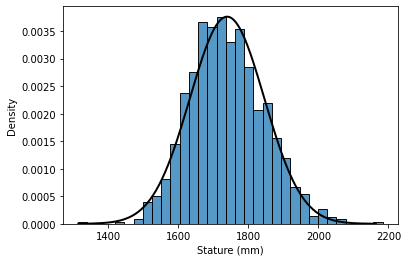

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

data = df["Stature (mm)"]

sns.histplot(x=data, stat="density")
normal(data.mean(), data.std())

We now calculate a range of percentiles:

In [5]:
percentages = np.array([0,1,5,50,95,99,100])
stature_percentiles = df["Stature (mm)"].describe(percentiles=percentages * 0.01)

print(stature_percentiles)

count    1266.000000
mean     1739.717220
std       106.053237
min      1315.000000
0%       1315.000000
1%       1520.650000
5%       1579.000000
50%      1732.500000
95%      1918.000000
99%      2007.100000
100%     2183.000000
max      2183.000000
Name: Stature (mm), dtype: float64


Adding the aforementioned 200mm to the percentiles, we arrive at the required door height:

In [6]:
door_height = stature_percentiles + 200

from IPython.display import Markdown as md
md("So a door of %gmm should be sufficient."%door_height["99%"])

So a door of 2207.1mm should be sufficient.

## Door knob height
For the door knob height, we can take a similar approach but now only look at the average elbow height so that it is within comfortable reach for most people.

Let's have a look at the distribution of elbow height in standing posture:

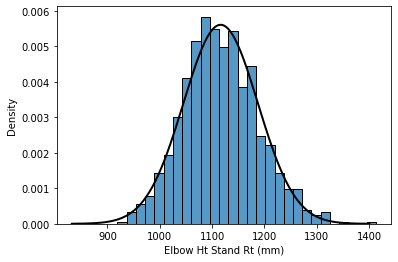

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = stats.norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

data = df_3d["Elbow Ht Stand Rt (mm)"]

sns.histplot(x=data, stat="density")
normal(data.mean(), data.std())

In [8]:
mean_elbow_height = df_3d["Elbow Ht Stand Rt (mm)"].mean()
knob_height = mean_elbow_height

from IPython.display import Markdown as md
md("So a door knob should be positioned at a height of %gmm."%knob_height)

So a door knob should be positioned at a height of 1116.49mm.

In [11]:
from dined.calculate import *

get_design_param(df_3d["Elbow Ht Stand Rt (mm)"], "50", 0)

1112.3

In [12]:
df_3d["Elbow Ht Stand Rt (mm)"].mean()

1116.4901310043667

In [13]:
populations = ['df_3d', 'df']